<a href="https://colab.research.google.com/github/Pawan-kumar-Singh/Hppymonk.AI/blob/main/Happymonk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [164]:
#importing libraries
import pandas as pd
import numpy as np
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout

In [91]:
#loading data from keras 
(X_train, y_train),(X_test, y_test) = keras.datasets.mnist.load_data()

In [92]:
#First image of our data set in pixels
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [93]:
#shape of first image
X_train[0].shape

(28, 28)

Pixel value of firt image

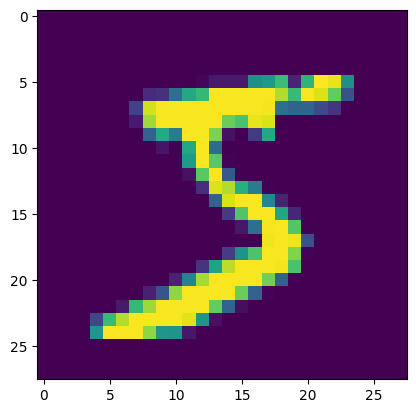

In [94]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

With the help of matplot lib I have ploted the first image of our training data set.

In [95]:
#shape of our dataset
X_train.shape

(60000, 28, 28)

In training data set we have 60k image of numbers with pixels of 28*28

In [96]:
X_test.shape

(10000, 28, 28)

In test data set we have 10k image with pixles of 28*28

In [97]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

y_train is our labels input 

**So in our MNIST data set we have total 70K image 60K for training and 10k for test**

## Data Normalization

In [98]:
# We have maximum pixel value is 255 so if we divide every image pixel with 255 so the maximum value 
#become one 
X_train = X_train/255
X_test = X_test/255

In [99]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [100]:
from keras.api._v2.keras import activations
#Creating a model
model = Sequential()

#Flatten convert your imput data in on dimension
model.add(Flatten(input_shape=(28,28)))

#adding our first input layer
model.add(Dense(128,activation='relu'))

#adding outpult layer
model.add(Dense(10,activation='softmax'))

In [101]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In First dence layer we have 784 input 128 nodes so 784*128 = 100352(weights) + 128 (bias) there for total 100480 trainable parameters.

In between hidden layer and output layer there are 128 input and 10 node so 128*10 = 1280 (weights) + 10 (bias) there for total 1290 trainable parameters.

In [102]:
#Compile our model
model.compile(loss='sparse_categorical_crossentropy', optimizer = 'Adam',metrics=['accuracy'])

In [103]:
#train our model
history = model.fit(X_train,y_train, epochs=10,validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2824 - accuracy: 0.9204 - val_loss: 0.1582 - val_accuracy: 0.9543
Epoch 2/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1263 - accuracy: 0.9630 - val_loss: 0.1168 - val_accuracy: 0.9658
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0865 - accuracy: 0.9748 - val_loss: 0.1053 - val_accuracy: 0.9667
Epoch 4/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0655 - accuracy: 0.9807 - val_loss: 0.0903 - val_accuracy: 0.9709
Epoch 5/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0492 - accuracy: 0.9847 - val_loss: 0.0862 - val_accuracy: 0.9735
Epoch 6/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0392 - accuracy: 0.9877 - val_loss: 0.0817 - val_accuracy: 0.9756
Epoch 7/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0292 - accuracy: 0.9910 - val_loss: 0.0958 - val_accuracy:

In [104]:
# prediction of our model
y_prob = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [105]:
y_pred = y_prob.argmax(axis=1)

In [106]:
# test accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9752

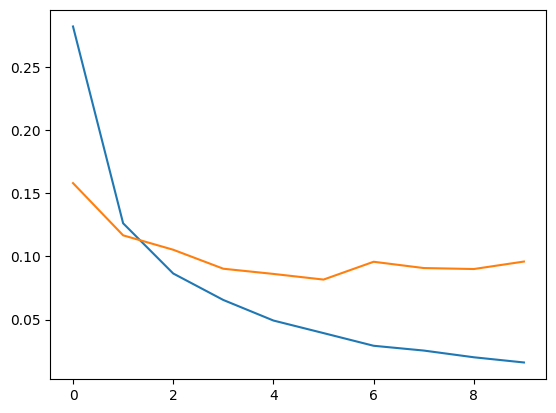

In [107]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

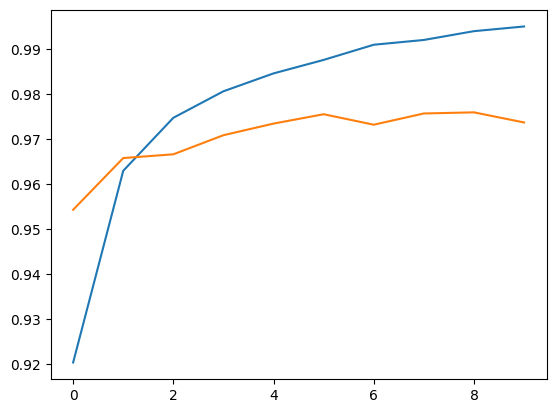

In [108]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

# Experiment 
## Best optimizer of this data set
## Try to find right number of nureon for data set
## Right number of layer for the data set
## Find best Activation function for the data set

In [109]:
pip install -U keras-tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Best optimizer of this data set

In [110]:
#select best optimizer
import kerastuner as kt

In [111]:
def build_model(hp):

  model = Sequential()

#Flatten convert your imput data in on dimension
  model.add(Flatten(input_shape=(28,28)))

#adding our first input layer
  model.add(Dense(128,activation='relu'))

#adding outpult layer
  model.add(Dense(10,activation='softmax'))
  optimizer = hp.Choice('optimizer',values = ['adam','sgd','rmsprop','adadelta'])
  model.compile(optimizer = optimizer, loss='sparse_categorical_crossentropy',metrics = ['accuracy'] )
  return model

In [112]:
tuner = kt.RandomSearch(build_model,
                        objective = 'val_accuracy',
                        max_trials = 5)

In [113]:
tuner.search(X_train,y_train, epochs = 5, validation_data =(X_test, y_test))

In [114]:
tuner.get_best_hyperparameters()

In [115]:
tuner.get_best_hyperparameters()[0].values

{'optimizer': 'rmsprop'}

In [116]:
model = tuner.get_best_models(num_models=1)[0]

In [117]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [118]:
model.fit(X_train,y_train,batch_size=196, epochs=10,initial_epoch = 5,validation_data = (X_test,y_test))

Epoch 6/10
307/307 [==============================] - 3s 10ms/step - loss: 0.0379 - accuracy: 0.9895 - val_loss: 0.0725 - val_accuracy: 0.9803
Epoch 7/10
307/307 [==============================] - 3s 9ms/step - loss: 0.0309 - accuracy: 0.9917 - val_loss: 0.0746 - val_accuracy: 0.9800
Epoch 8/10
307/307 [==============================] - 3s 9ms/step - loss: 0.0267 - accuracy: 0.9924 - val_loss: 0.0719 - val_accuracy: 0.9794
Epoch 9/10
307/307 [==============================] - 3s 11ms/step - loss: 0.0230 - accuracy: 0.9937 - val_loss: 0.0696 - val_accuracy: 0.9794
Epoch 10/10
307/307 [==============================] - 3s 9ms/step - loss: 0.0201 - accuracy: 0.9947 - val_loss: 0.0722 - val_accuracy: 0.9794


# Try to find right number of nureon

In [137]:
from keras import metrics
def build_model(hp):

  model = Sequential()
  
  units = hp.Int('units',min_value = 128,max_value= 512)
  
  #Flatten convert your imput data in on dimension
  model.add(Flatten(input_shape=(28,28)))
 
  #adding our first input layer
  model.add(Dense(units=units,activation='relu'))

  #adding outpult layer
  model.add(Dense(10,activation='softmax'))

  model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  return model


In [138]:
tuner = kt.RandomSearch(build_model,
                        objective='val_accuracy',
                        max_trials=5,
                        directory = 'dir',
                        #project_name = 'nodes'
                        )

In [139]:
tuner.search(X_train,y_train, epochs = 5, validation_data = (X_test,y_test))

Trial 5 Complete [00h 00m 59s]
val_accuracy: 0.9800999760627747

Best val_accuracy So Far: 0.9800999760627747
Total elapsed time: 00h 03m 45s


In [140]:
tuner.get_best_hyperparameters()[0].values

{'units': 340}

# Right number of layer

In [144]:
def build_model(hp):

  model = Sequential()
  model.add(Flatten(input_shape=(28,28)))
  #adding our first input layer
  model.add(Dense(340,activation='relu'))

  for i in range(hp.Int('num_layers', min_value=1, max_value=10)):
    model.add(Dense(340,activation ='relu'))

  #adding outpult layer
  model.add(Dense(10,activation='softmax'))
  
  model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  
  return model

In [145]:
tuner = kt.RandomSearch(build_model,
                        objective = 'val_accuracy',
                        max_trials=3,
                        directory = 'dir',
                        project_name = 'num_layer')

In [146]:
tuner.search(X_train,y_train, epochs=5, validation_data=(X_test,y_test))

Trial 3 Complete [00h 02m 16s]
val_accuracy: 0.9786999821662903

Best val_accuracy So Far: 0.9789000153541565
Total elapsed time: 00h 06m 46s


In [147]:
 tuner.get_best_hyperparameters()[0].values

{'num_layers': 2}

# Find best Activation function

In [165]:
def build_model(hp):
  model = Sequential()

  counter = 0

  model.add(Flatten(input_shape=(28,28)))
  #adding our first input layer
  model.add(Dense(340,activation='relu'))

  for i in range(hp.Int('num_layers',min_value=1,max_value=10)):
    if counter == 0:
      model.add(
          Dense(
              hp.Int('units' + str(i), min_value=128, max_value = 512, step = 32),
              activation = hp.Choice('activation'+ str(i), values=['relu','tanh','softmax']),
              ))
      model.add(Dropout(hp.Choice('dropout'+ str(i), values=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])))
    else:
      model.add(
          Dense(
              hp.Int('units' + str(i), min_value=128, max_value = 512),
              activation = hp.Choice('activation'+ str(i), values=['relu','tanh','softmax']),
              ))
      model.add(Dropout(hp.Choice('dropout'+ str(i), values=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])))
    
    counter+=1

  #adding outpult layer
  model.add(Dense(10,activation='softmax'))

  model.compile(optimizer=hp.Choice('optimizer',values=['rmsprop','adam','sgd','nadam','adadelta']),
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  return model

In [166]:
tuner = kt.RandomSearch(build_model,
                        objective = 'val_accuracy',
                        max_trials = 3,
                        directory = 'mydir',
                        project_name = 'final')

In [167]:
tuner.search(X_train,y_train,epochs=5,validation_data=(X_test,y_test))

In [168]:
tuner.get_best_hyperparameters()[0].values

{'num_layers': 9,
 'units0': 480,
 'activation0': 'softmax',
 'optimizer': 'sgd',
 'units1': 128,
 'activation1': 'relu',
 'units2': 128,
 'activation2': 'relu',
 'units3': 128,
 'activation3': 'relu',
 'units4': 128,
 'activation4': 'relu',
 'units5': 128,
 'activation5': 'relu',
 'units6': 128,
 'activation6': 'relu',
 'units7': 128,
 'activation7': 'relu',
 'units8': 128,
 'activation8': 'relu'}

In [169]:
model.fit(X_train,y_train,epochs=10,initial_epoch=5,validation_data=(X_test,y_test))

Epoch 6/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0337 - accuracy: 0.9926 - val_loss: 0.1397 - val_accuracy: 0.9781
Epoch 7/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0287 - accuracy: 0.9937 - val_loss: 0.1604 - val_accuracy: 0.9774
Epoch 8/10
1875/1875 [==============================] - 20s 10ms/step - loss: 0.0239 - accuracy: 0.9948 - val_loss: 0.1593 - val_accuracy: 0.9815
Epoch 9/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0229 - accuracy: 0.9947 - val_loss: 0.1587 - val_accuracy: 0.9797
Epoch 10/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0213 - accuracy: 0.9955 - val_loss: 0.1735 - val_accuracy: 0.9816
